In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uplading the data set into python env
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo (4).csv


## **Exploratory Data Analysis**

### **Loading The Data Set**

In [3]:
df = pd.read_csv('Zoo.csv') #Reading the data set
df.info() #General info of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#Reading head of the data set to review
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### **Overview Of The Data Set**

"The dataset consists of 101 animals and 18 features(columns), where the goal is to classify the animal type based on the features like wing,legs mammal. Each row represents an animal, and the columns describe its characteristics using binary or numerical values."

**=> <u>Dataset Structure</u>**
- Total Samples: 101
- Total Features: 18 (including the target variable 'type')
- Feature Types:
 - Categorical (Binary: 0 or 1) - hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, tail, domestic, catsize.
 - Numerical (Discrete): legs (Number of legs).
- Target Variable: type (Classification label representing different animal classes ).
 - For example type 1 is might represents wild animal as the animals boar,bear,antelope categorized as type 1

**=> <u>General Observations</u>**
- The dataset contains a mix of mammal, fish, bird, reptile, amphibian, and insect characteristics.
- The animal name column is not useful for classification and should be removed.
- The type column represents the class label, which is our target variable.
- All feature values (except animal name) are numerical and binary, except for legs, which has discrete values.



### **Descriptive Statistics**

In [5]:
#Statistical Summary of numerical feature
Basic_stats = df.describe()
skewness = df.skew(numeric_only = True)
kurtosis = df.kurtosis(numeric_only = True)

Dist_stats = pd.DataFrame({'skewness':skewness,'kurtosis':kurtosis}).T

Stats_table = pd.concat([Basic_stats,Dist_stats],axis = 0)

Stats_table

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000
skewness,0.304908,1.538501,-0.346676,0.388876,1.251556,0.608577,-0.222443,-0.431569,-1.707118,-1.461244,3.163428,1.799849,0.139427,-1.126430,2.250991,0.263515,0.852362
kurtosis,-1.945969,0.373997,-1.918204,-1.886536,-0.442773,-1.662967,-1.990336,-1.850801,0.932321,0.137564,8.168668,1.264099,-0.598630,-0.746333,3.128527,-1.969973,-0.697422


### **Interpretation Of Descriptive Analysis**

 **<u>Central Tendency and Dispersion</u>**

 **=> Mean Values:**

  For binary features, the mean represents the proportion of animals that have a given trait. For example:

 - hair:- Mean of 0.426 suggests about 42.6% of animals have hair.
 - feathers:- Mean of 0.198 indicates roughly 19.8% have feathers.
 - eggs:- Mean of 0.584 suggests 58.4% of animals lay eggs.
 - milk:- Mean of 0.406 implies about 40.6% produce milk.
 - Legs:- Mean of 2.84 and a median (50th percentile) of 4 indicate that while many animals have around 4 legs, some have fewer, pulling the mean lower.Ranging from 0 to 8 legs shows variability, likely due to different animal classes (probably "insects" like spiders,cetipedes,etc).

**=> Standard Deviation**

 For binary variables, an std close to 0.5 (like hair's 0.497) indicates a relatively balanced distribution means that same amount of 0's and 1's , though some attributes (like backbone with an std of 0.385) are more skewed toward one category either left or right.

**<u>Shape Of Distribution</u>**

 => Skewness

- Low to Moderate Skew:
  - Hair (0.305) is fairly symmetric.
  - Eggs (-0.347) shows a slight left skew, meaning a small tail on the lower side.
- High Skew:
  - Feathers (1.539) indicates most animals do not  have feathers, with a few having them.
  - Venomous (3.163) is highly positively skewed, meaning the majority of animals are non-venomous with only a few exceptions.

=>Kurtosis:

- Negative Kurtosis (Platykurtic):
 - Hair, eggs, and milk have kurtosis values around -1.9, suggesting these distributions are flatter than a normal distribution with lighter tails.
- High Kurtosis:
 - Venomous has a kurtosis of 8.169, reflecting a strong peak and heavy tails, reinforcing that most values are 0 with some extreme values (i.e., the few cases where an animal is venomous).

=> Target Variable (type)

 - The mean value of type is 2.83 with a standard deviation of about 2.10 suggests that the classes are spread out across the range.
 - The target variable, being categorical (although represented numerically), likely corresponds to distinct animal groups. The variation here is crucial for understanding classification challenges.

**<u>Key Takeaways</u>**

=> Data Completeness:

 There are no missing values in the dataset and it is ready for modeling without needing imputation.

=> Binary Features:

There are many binary features in the dataset, and their mean's directly indicate the proportion of animals with that attribute.

=> Variability in Legs:

The legs column shows diversity in animal morphology, which might be significant in distinguishing different animal types.

=> Imbalanced Attributes:

Attributes like feathers and venomous are skewed, meaning there are some small subsets of animals have these traits, which could impact model training if not handled properly (e.g., through weighting or sampling strategies).

=> Class Distribution:

The target variable (type) has a spread that suggests multiple classes, which will be important when evaluating the classifier's performance.

### **Data Visualization**

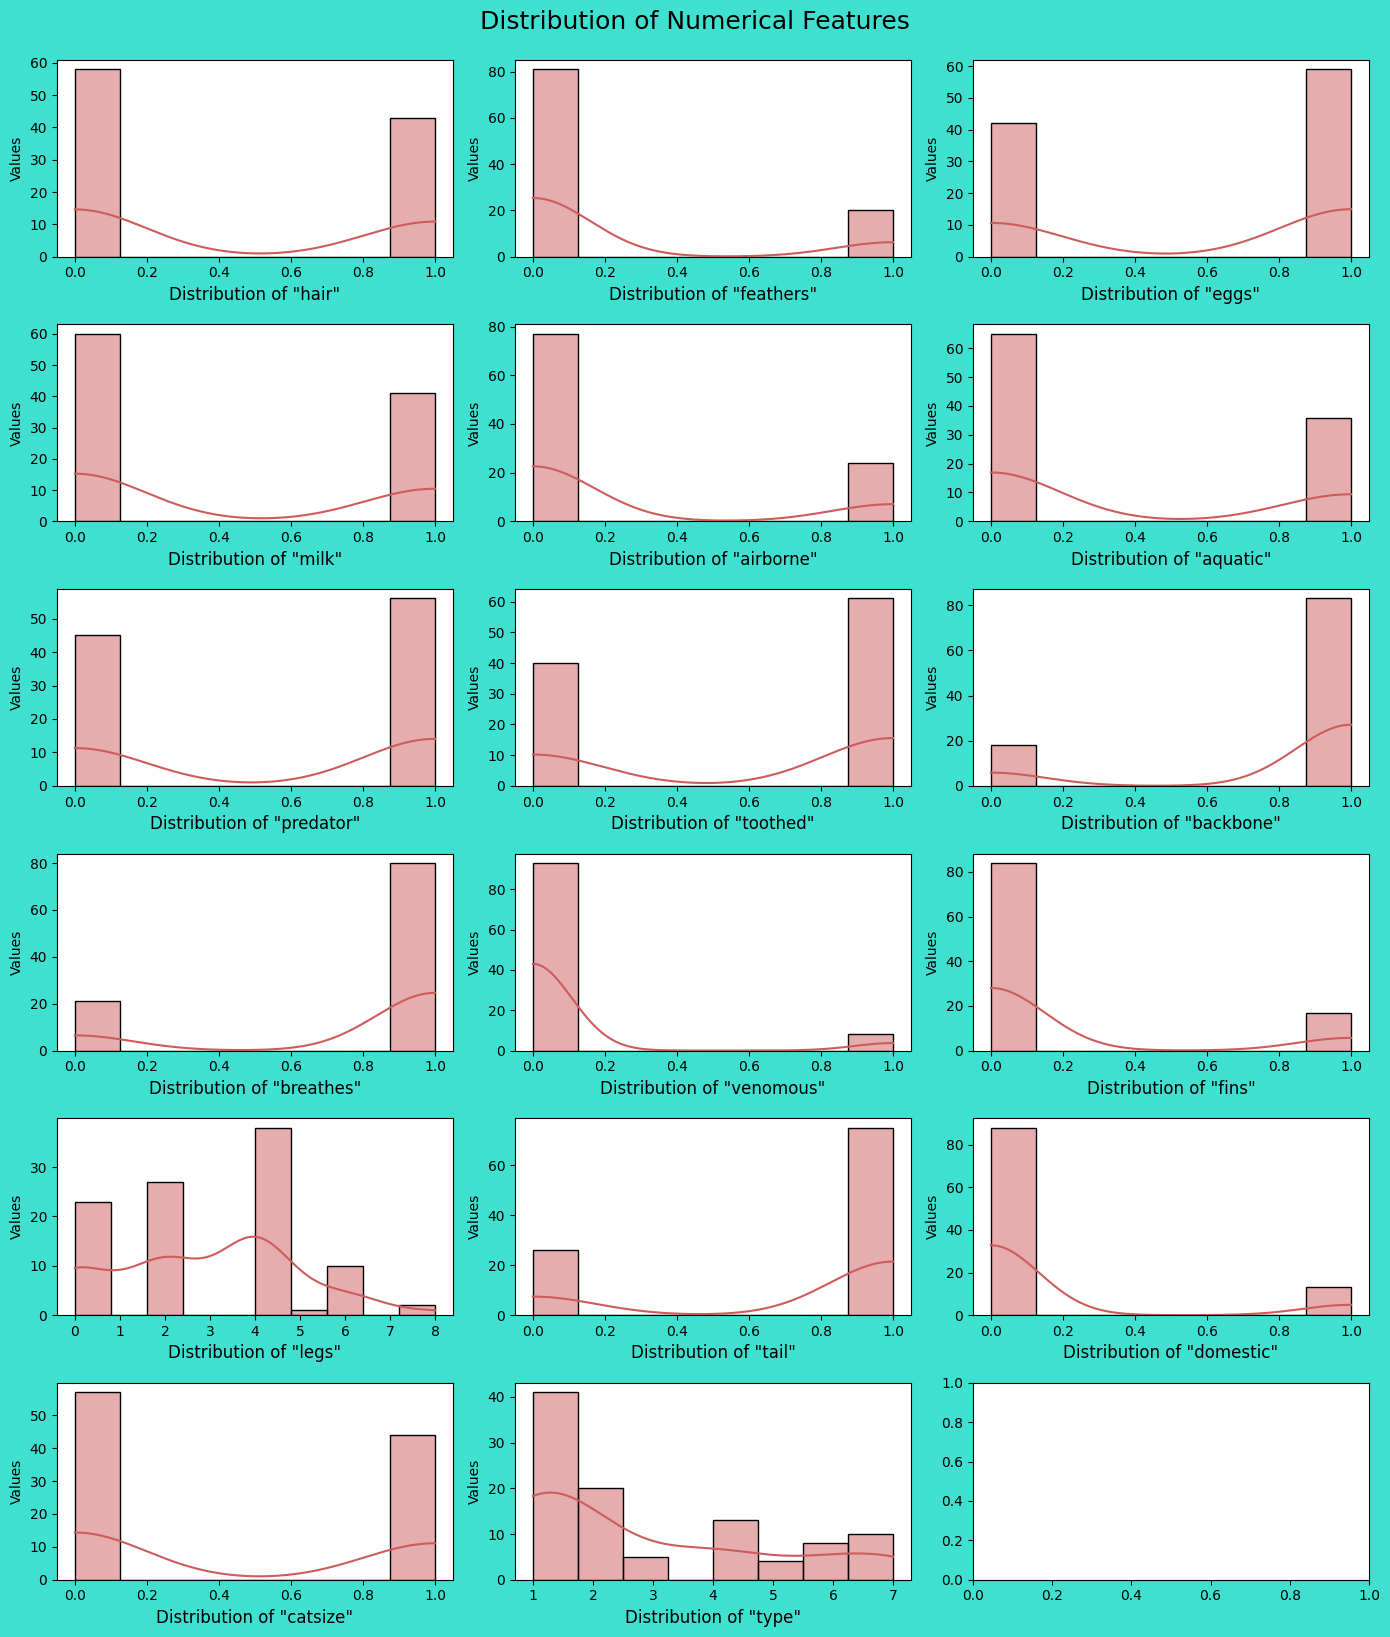

In [6]:
#Visualization of numerical columns in different plots
#Histograms of numerical columns

numerical_cols = df.select_dtypes(include = ['int64','float64']).columns

fig,axes = plt.subplots(nrows = 6,ncols = 3,figsize = (14,16),facecolor = 'turquoise')
axes = axes.flatten()

for i,col in enumerate(numerical_cols):
  sns.histplot(data = df,x = col,kde = True,ax = axes[i],color ='indianred')
  axes[i].set_xlabel(f'Distribution of "{col}"',fontsize = 12)
  axes[i].set_ylabel('Values')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features',y = 1.02,fontsize = 18)
plt.show()

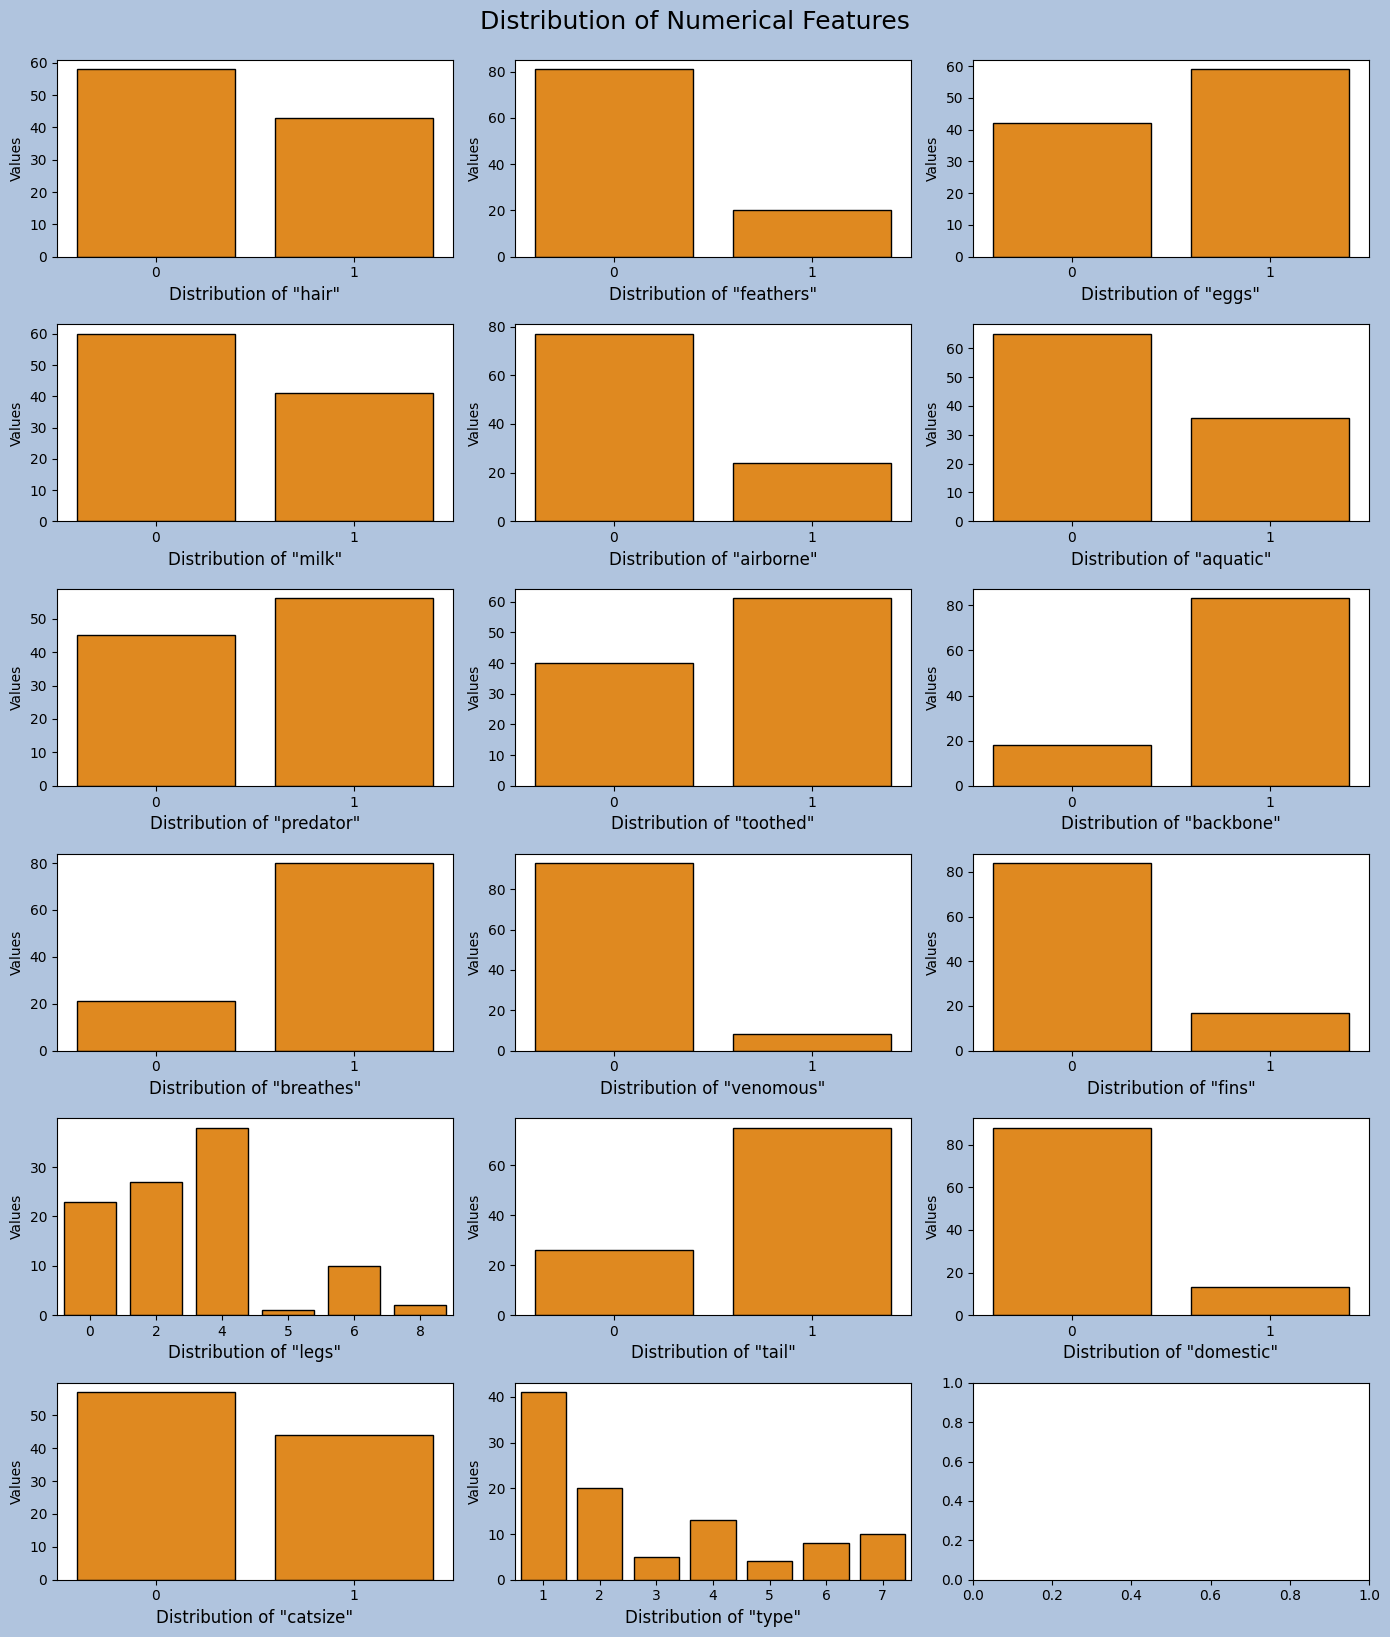

In [7]:
#Countplot of numerical columns
fig,axes = plt.subplots(nrows = 6,ncols =3,figsize = (14,16),facecolor = 'lightsteelblue')
axes = axes.flatten()

for i,col in enumerate(numerical_cols):
  sns.countplot(data = df,x = col,ax = axes[i],color = 'darkorange',edgecolor ='black')
  axes[i].set_xlabel(f'Distribution of "{col}"',fontsize = 12)
  axes[i].set_ylabel('Values')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features',y = 1.02,fontsize = 18)
plt.show()

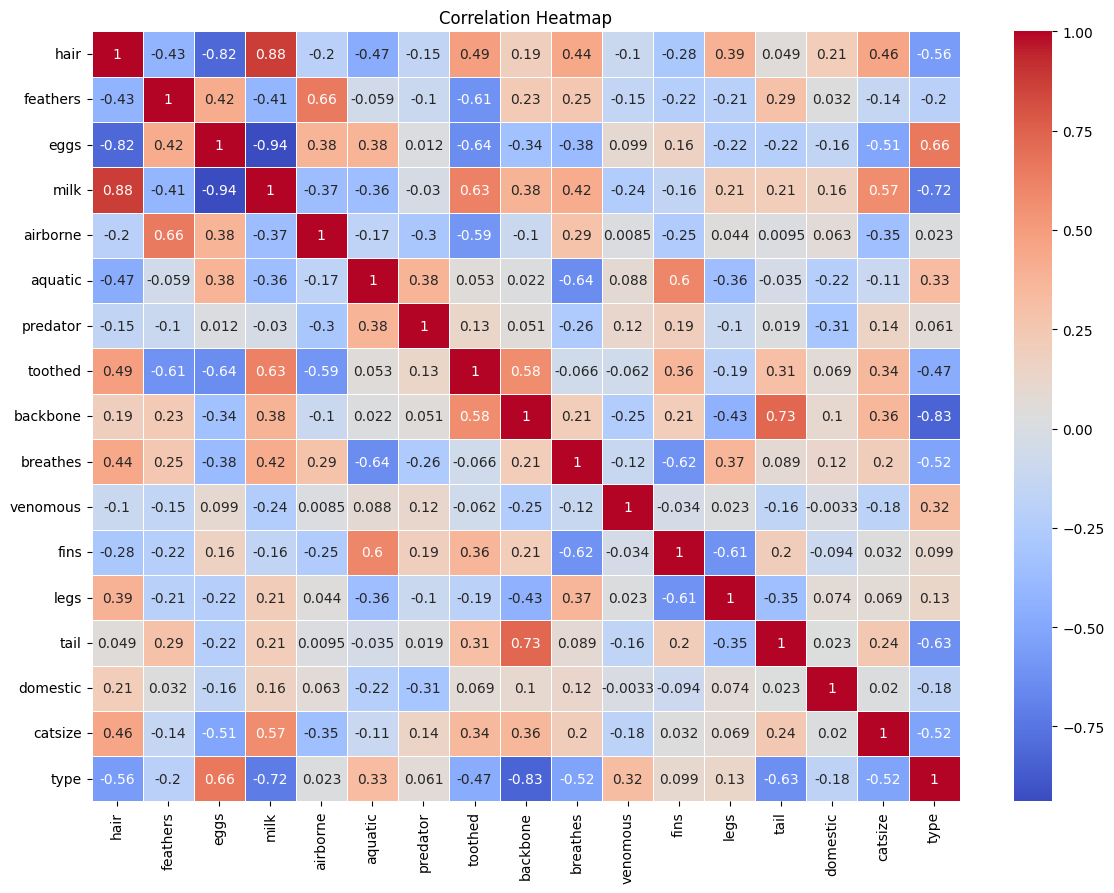

In [8]:
#Correlation heatmap
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(14, 10)) #Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.show()

### **Insigts And Pattern**

**<u>From Histograms & Barplots</u>**

- The histograms shows the distributions of numerical features, with a kernel density estimation (KDE) curve overlaying the distribution but barplots shows more clearer representation of features compared to kde plots.
- Since most of the features are binary (0 or 1), making the KDE curve unnecessary.and these features represent categorical characteristics than continous.

  "Slightly to clear right skewed(Low to moderate skewed), meaning only few more animal lacks these traits than those who has".
  - hairs,fethures,milk,fins,airborne,aquatic,legs,catsize
  > Suggesting there are less mammal,sea and bird type animals

  "Highly Right skewed(Well skewed),meaning most animals doesn't have these kind of traits than those who has them".
  - Venomous and domestic are rare in this set
  > This indicating there only a few no of animal which are venomous or can be domesticated.

  "Slightly left to clear left skewed(Negative skewness)",meaning only few animals doesn't have this traits .
  - Eggs,backbone,predator,toothed,breaths and has tails.
  > Most of the animals are wild animals or non sea creatures

- Only two variables such as "legs" and "type" have more diverse distributions.since not all animals have same no.of legs
 - Two legged animal mostly birds with wings,has feathers
 - Four legged with tails mostly mammals/wild animals.
 - 6 and above are mostly insects type animals.

**<u>From Correlation Heatmap</u>**
> Correlation heatmap displays correlation between numerical variables using a color-coded scale.

 - An obvious strong negative correlation between "milk" and "eggs" (-0.94) so does hair and eggs (-0.82) suggests mammals (which produces milk) do not lay eggs .
 - "Hair" and "Milk" have a high positive correlation (0.88), implying mammals with hair tend to produce milk.
 - Similarly tooth and backbone (0.58) animals with backbone more likely have teeth
 - Another obvious positive correlation between "Aquatic" and "Fins" (0.60) mean animals with fins are more likely to be aquatic.
 - "Backbone" has strong negative correlations with "type" (-0.83), indicating its importance in classification of animals since many types of animal dont have back bones such sea creature,insects.
 - The "Predator" feature has weak correlations with other features, meaning predators exist across different biological categories.
 - "Legs" do not show strong correlations with other binary features, implying that leg count alone is not a strong predictor of other traits.
 - The heatmap effectively highlights relationships between features.


### **Data Preprocessing**

#### **Handling Missing Values**

In [9]:
#Ensureing there are no missing values
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


> -  There are no missing values in the data set since the features are binary there might be some missing values recorded as 0's
- As we observed before the data set is already seems to have no outliers and encoded as well
- The data is about predicting what type of animals it is based on the features/traits so these traits are important in predicting the type since data has many dimensions let's reduce them using MCA(multiple correspondence analysis) which is best for where most features are binary .
- Since the data set is small it won't be computationally expensive to compute the distance of all points which means it doesn't need the use of KD-trees or ball trees to speed up the algorithm.
- Let's start with scaling the data with appropriate methods.


### **Feature Scaling**

In [10]:
#Scaling the feature with appropriate methods for each columns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mm_cols =['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','tail','domestic','catsize']
ss_cols = ['legs']

mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

df[mm_cols] = mm_scaler.fit_transform(df[mm_cols])
df[ss_cols] = ss_scaler.fit_transform(df[ss_cols])

In [11]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.572540,0.0,0.0,1.0,1
1,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.572540,1.0,0.0,1.0,1
2,bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.404435,1.0,0.0,0.0,4
3,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.572540,0.0,0.0,1.0,1
4,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.572540,1.0,0.0,1.0,1


In [12]:
#Dropping the unncessary features
df.drop('animal name',axis = 1,inplace = True)

In [13]:
#Splitting the data set in train and test
from sklearn.model_selection import train_test_split

X = df.drop('type',axis = 1)
y = df['type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 16)
Testing set size: (21, 16)


### **Implementing K-Nearest Neighbor**

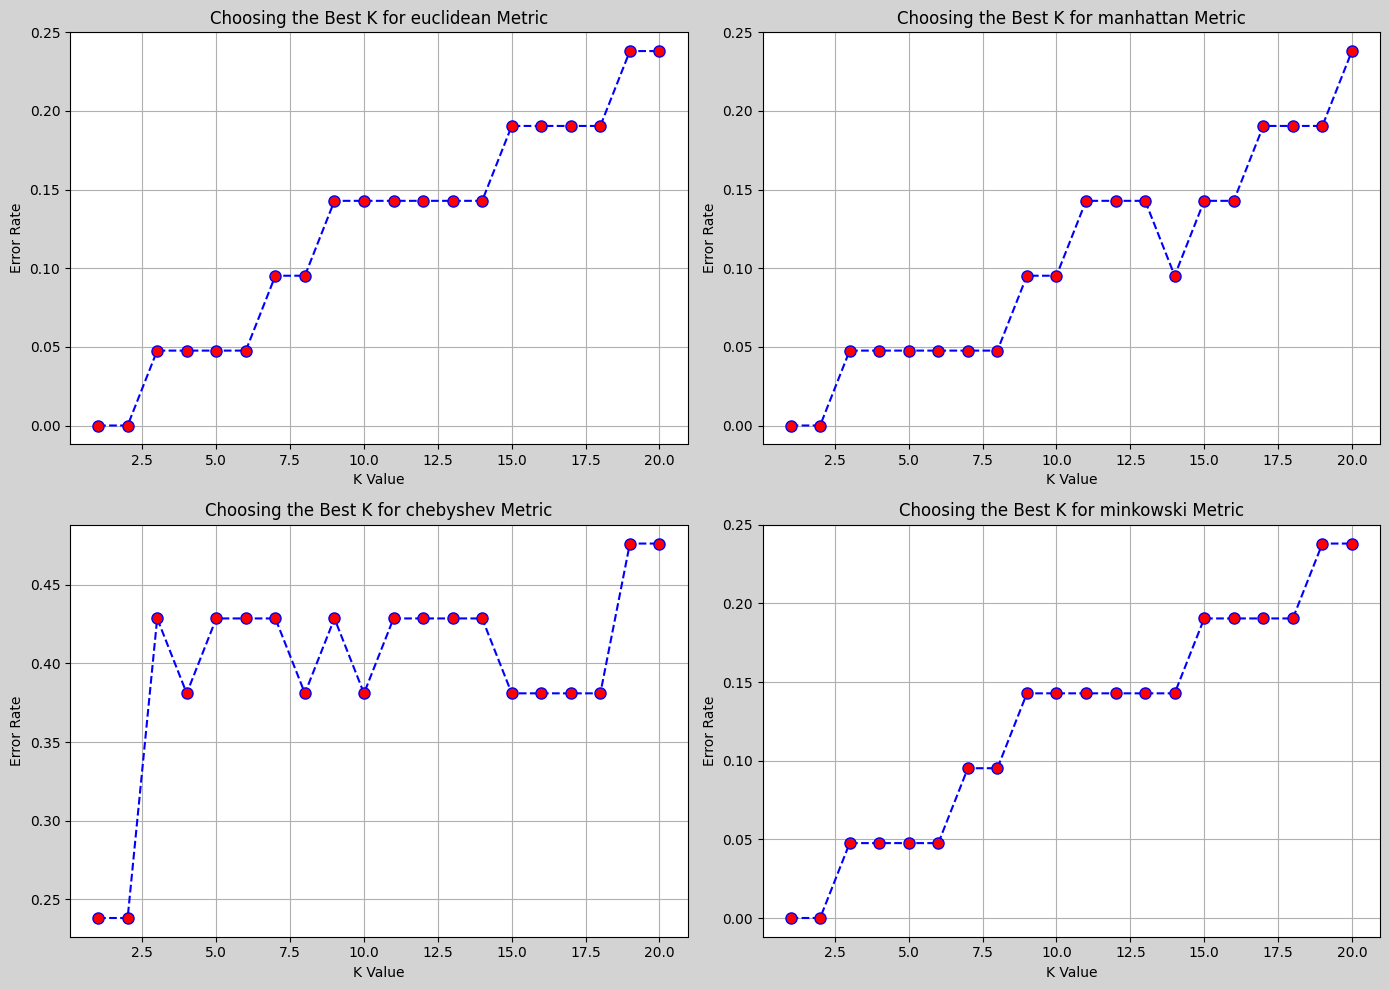

In [14]:
#Training the model to see which is best k value and best
from sklearn.neighbors import KNeighborsClassifier

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10), facecolor='lightgray')
axes = axes.flatten()

for i, metric in enumerate(metrics):
    error_rate = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        pred_k = knn.predict(X_test)
        error_rate.append(np.mean(pred_k != y_test))

    ax = axes[i]
    ax.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
    ax.set_xlabel('K Value')
    ax.set_ylabel('Error Rate')
    ax.set_title(f'Choosing the Best K for {metric} Metric')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [15]:
#Training the model with best K value and best metric
best_k = 3.0
best_metric = 'manhattan'

knn = KNeighborsClassifier(n_neighbors=int(best_k), metric=best_metric)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

### **Evaluating The Best Model**

In [16]:
#Evaluation the model with appropriate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9523809523809523
Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.94      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



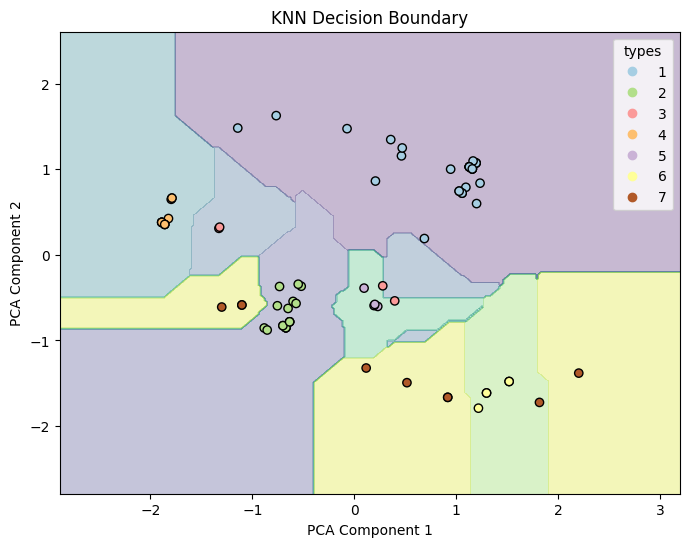

In [17]:
#Visualizing decision boundaries
from sklearn.decomposition import PCA

#Reducing dimensions to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Train K-NN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=int(best_k), metric="manhattan")
knn_pca.fit(X_train_pca, y_train)

#Plotting decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KNN Decision Boundary')
    plt.legend(*scatter.legend_elements(), title="types")
    plt.show()

plot_decision_boundary(knn_pca, X_train_pca, y_train)


### **Interview Questions**

---
**1. What are the key hyperparameters in KNN?**

---
The key hyperparameters in K-Nearest Neighbors (KNN) are:

=> Number of Neighbors (n_neighbors = K)

> - It defines how many nearest neighbors are there to consider when classifying a new data point.
- A small K (like 1-3) makes the model sensitive to noise, increasing variance.
- A large K (like 10-20) smooths the decision boundary but may reduce accuracy.

=> Distance Metric (metric)

> - Distance metrics determines how the "closeness" of neighbors is measured.
- There are some common metrics include Euclidean, Manhattan,chebyshev and Minkowski.

=> Weight Function (weights)

> - Weighting function controls how neighbors contribute to making the decision:
 - Uniform: All neighbors have equal weight.
 - Distance-based: Closer neighbors have more influence.

=> Other Algorithm for Searching Neighbors (algorithm)

 - Methods used to find the nearest neighbors efficiently:
 - Brute-force (computes all distances)
 - KD-Tree (good for low dimensions)
 - Ball-Tree (better for high dimensions)

=> Leaf Size (leaf_size)

- Leaf size affects the speed and memory usage of KD-Tree and Ball-Tree methods.

=> Power Parameter (p)

- Used with the Minkowski metric to generalize Euclidean (p=2) and Manhattan(p=1).

---
---
**2. What distance metrics can be used in KNN?**

---
The choice of distance metric impacts the classification performance:

=> Euclidean Distance (p=2, Minkowski)

- Most commonly used distance metric.
- Works well when features have similar scales and sensitive to outliers.

=> Manhattan Distance (p=1, Minkowski)

- Good for grid-based data (eg: city block distances) and less sensitive to outliers than Euclidean.

=> Minkowski Distance (Generalized form)

- For p=1, it's Manhattan Distance.
- For p=2, it's Euclidean Distance.

=> Chebyshev Distance

- Measures the maximum difference across dimensions.

=> Mahalanobis Distance

- Accounts for feature correlations.
- Useful when features have different variances.

=> Hamming Distance

- Used for categorical variables (e.g., DNA sequences, text data).
- Counts the number of positions where two vectors differ.

=> Cosine
-	In case there is Text/data with sparsity (e.g., TF-IDF).

### **Brief Report**

### **Title : Classification Of Zoo Animals Using K-Nearest Neighbors**

### **Introduction**
The Goal of this assignment is about classifying the animals based on the features they have using the K-nearest neighbor algorithm.the data set consists of 101 animals with 18 features(including target variable and the name of the animal)

### **Methodology**

**=> <u>Exploratory Data Analysis And Data Preprocessing</u>**

- Loaded the data set and explored using descriptive statistics and visualization techniques.
- We make sured that there are no missing values.
- Data set was encoded observed by the features being mostly binary.
- Feature scaling performed using minmax scaling on binary features and standard scaling on continous features
- Dropped unncessary column "animal name".

**=> <u>Model Implementing And Training</u>**

- Implemented the K-NN as per assignment requirement plotted for best K_value and metric using different metrics like euclidean,manhatten,chebyshev and minlowski evaluated using the error rate.
- Best K_value and metric "manhatten" were choosen based on the lowest rate we can find without overfitting the model
- Trained the model on 80% of the data.

**=> <u>Evalaution Of The Model</u>**

- Evaluated the trained model on test set which is 20%.
- Metrices like accuracy, confusion matrix, and classification report(Precision,recall,F1-score) were used to assess the model performance.
- With using PCA,Descision boundies were visualized

### **Result**

- The K-NN model achieved high accuracy on the test set.
- The classification report and confusion matrix provides detailed insight about model performance in classifying the types of animal.
- Decision boundary visualization shows how the model separates different animal types based on their features.

> **Conclusion**

The K-NN algoritms effectively classifies the animals into different types based on their traits .Model's high accuracy demonstrated the good generalization ability on the test set there might be other classification algorithms like random forest etc that could performe better.

